Graphs from `ui` package
=====================
Demonstrations of re-usable functions to make "standard" graphs.

In [9]:
# automatically reload changes we make to schools.py and ui.py
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


# graphs and viz
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx

import math

from IPython.display import Markdown as md
from school_data import schools, ui, exams


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# load the demographic data and merge it with the ELA data
df = schools.load_school_demographics()

# load the data from the csv file
ela = exams.load_ela()
#drop the rows with NaN (where the pop is too small to report)
ela = ela[ela["mean_scale_score"].notnull()]
ela = df.merge(ela, how="inner", on=["dbn", "ay"])
ela = ela.query("ay == 2018 and category == 'All Students'")


OLS Model Network Graph
--------------------------------------
`ui.plot_model` takes the `model` object from `statsmodel` OLS linear regression
and creates a network graph that plots the relation between
the factors and the dependent variable.

The example below uses the demographic factors of a school population
to predict the average ELA test score (`mean_scale_score`).

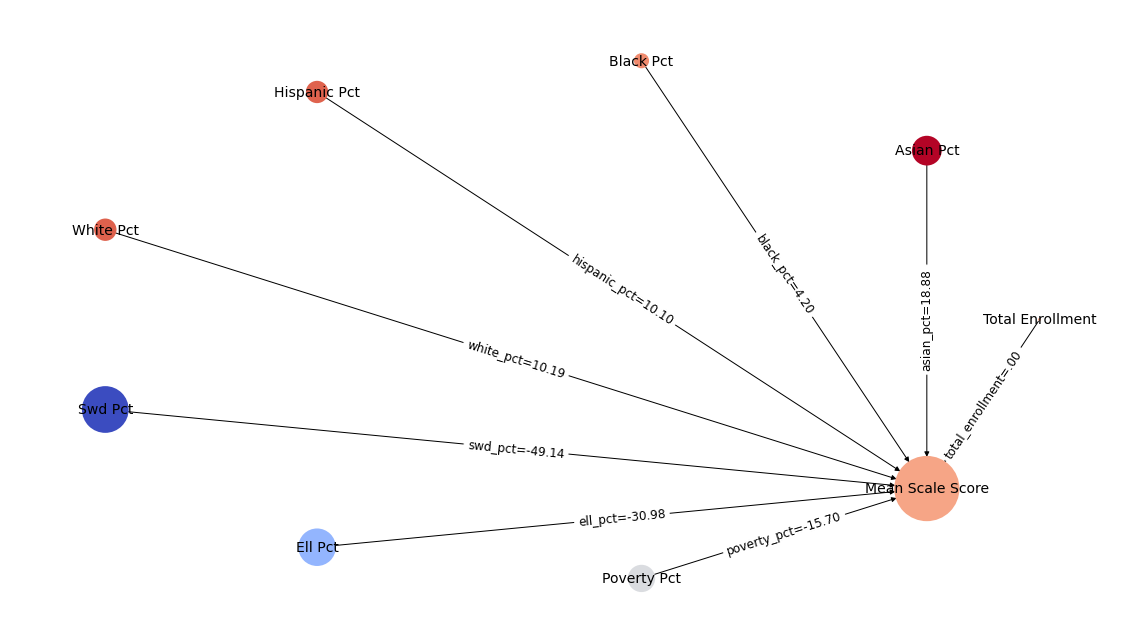

In [27]:
# calculate coefficients for these factors
factors = ['total_enrollment', 'asian_pct',  'black_pct', 
       'hispanic_pct',  'white_pct','swd_pct',  'ell_pct',  'poverty_pct']

# y is the DV
y = ela['mean_scale_score']

X = ela[factors]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

ui.plot_model(model)

Grouped Bar Chart
---------------------------
`ui.plot_group_bars`

Here we're going to plot the demographic data for Stuvesant, Bronx Science, and Brooklyn Tech
high schools. These three schools' admissions are set by NYS law to be based on scores on the SHSAT
exam. Other schools also use this exam for admissions, but NYC DOE can change the criteria for the
other "specialized" schools without seeking permission from NYS.

In [28]:
dbn =["02M475", "13K430", "10X445"]
special = df[df["dbn"].isin(dbn)]
special = special[special["year"] == special.year.max()]


special[schools.demo.core_cols].columns
cols = ['dbn','school_name', 'total_enrollment', 'male_pct', 'female_pct',
       'asian_pct', 'black_pct', 'hispanic_pct','white_pct', 'poverty_pct']
special = special[cols]
pretty_cols = ['id', 'school', 'total students', '% male', '% female', '% asian', '% black', '% hispanic','% white',  '% poverty']



# spec = pd.melt(totals, id_vars=id_cols, value_vars=cats, var_name="enroll_cat", value_name="enrollment")



ui.fmt_table(special, pct_cols=cols[3:], num_cols=["total_enrollment"], col_map=col_names)

data = pd.melt(special, id_vars=cols[:3], value_vars=cols[3:], var_name="pct_cat", value_name="pct")


NameError: name 'col_names' is not defined

In [126]:

data["school_name"] = data.apply(lambda row: f"{row.school_name} (n={row.total_enrollment})", axis = 1)
data = data[["school_name", "pct_cat", "pct"]].groupby(["school_name", "pct_cat"]).agg(max)

data = data.reset_index("school_name")
data

,school_name,pct
pct_cat,,
asian_pct,Brooklyn Technical High School (n=5921),0.599
black_pct,Brooklyn Technical High School (n=5921),0.056
female_pct,Brooklyn Technical High School (n=5921),0.404
hispanic_pct,Brooklyn Technical High School (n=5921),0.066
male_pct,Brooklyn Technical High School (n=5921),0.596
poverty_pct,Brooklyn Technical High School (n=5921),0.590
white_pct,Brooklyn Technical High School (n=5921),0.237
asian_pct,Stuyvesant High School (n=3342),0.714
black_pct,Stuyvesant High School (n=3342),0.014


In [ ]:
def config_plot(title="", y_label="", size=(12, 9),):
    fig, ax = plt.subplots(figsize=size)

    sns.set_context('talk')

    # Set the y-axis label
    ax.set_ylabel(y_label, labelpad=15)

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#efefef')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#efefef')
    ax.xaxis.grid(False)

    ax.legend()
    fig.tight_layout()
    ax.set_title(title, pad=40)
    return fig, ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Specialized High School Demographics'}>

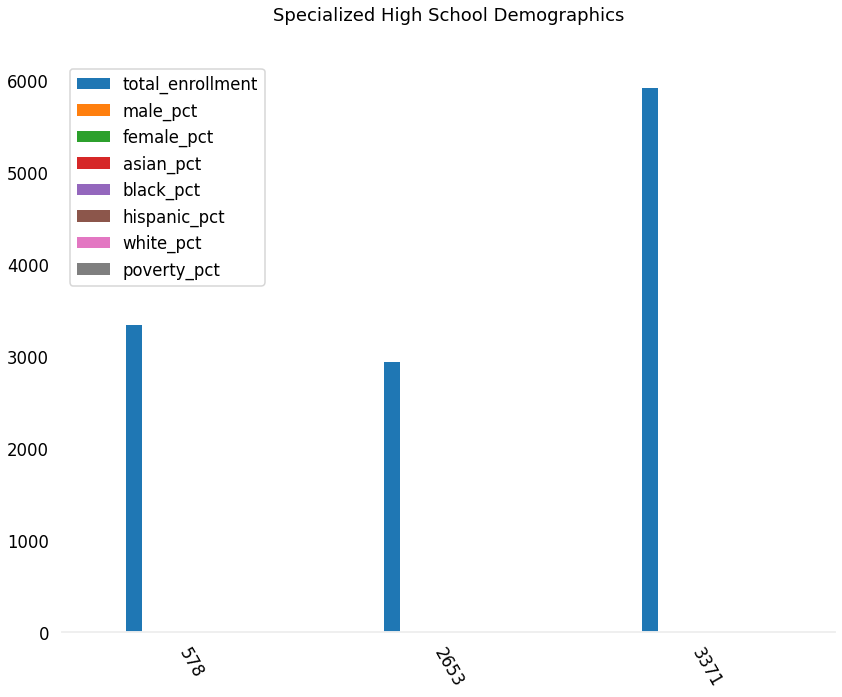

In [140]:

# special = special.drop("dbn", axis=1)
special.groupby("school_name").agg(max)
fig, ax = config_plot(title="Specialized High School Demographics")
special.plot.bar(ax=ax, rot=-60)


In [114]:
dbn =["02M475", "13K430", "10X445"]
special = df[df["dbn"].isin(dbn)]
special = special[special["year"] == special.year.max()]


special[schools.demo.core_cols].columns
cols = ['dbn','school_name', 'total_enrollment', 'male_pct', 'female_pct',
       'asian_pct', 'black_pct', 'hispanic_pct','white_pct', 'poverty_pct']
special = special[cols]

labels = special.school_name.unique()
labels = ["asian", "black"]
bars = [
    special.asian_pct.mean(),
    special.black_pct.mean()
]
speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',

         'rabbit', 'giraffe', 'coyote', 'horse']



foo = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)

display(special)
data = special.copy()
data.set_index
ax = data.plot.bar(rot=-60)

# for label, bar in bars:
#     r = ax.bar()
# width = .25
# x = np.arange(len(bars))
# fig, ax = config_plot(title="Specialized High School Demographics")


# add the bars
# for i, bar in enumerate(bar_cols, 1):
#     ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

# set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
# ax.set_xticklabels(data[x_cols])

# add the bars
# for i, bar in enumerate(bar_cols, 1):
#     ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

# set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
# ax.set_xticklabels(data[x_cols])



SyntaxError: invalid syntax (1785676820.py, line 31)

/tmp/ipykernel_6085/1098052182.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data[x_cols])


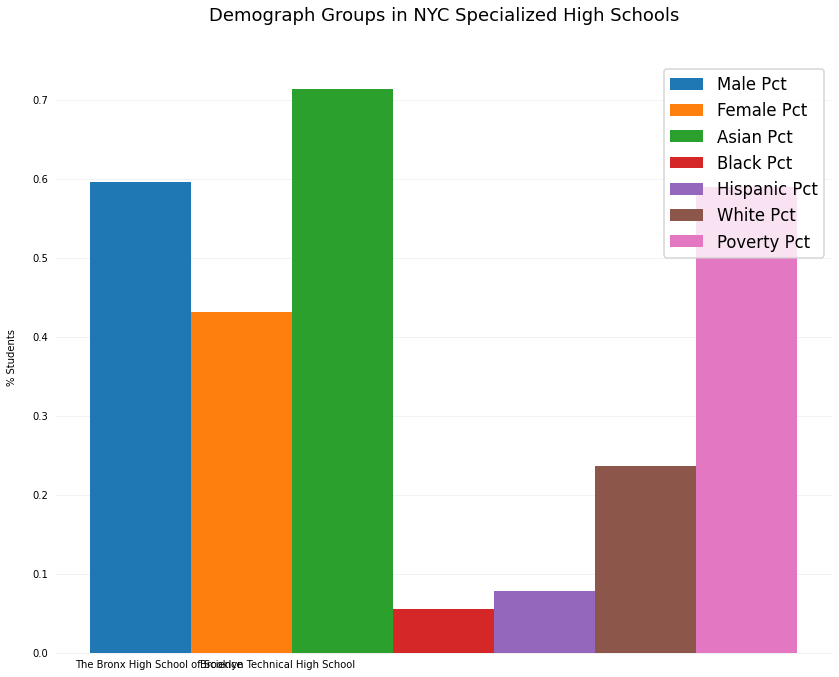

In [65]:
bar_cols = cols[3:]
data = special.copy()
x_label = "school_name"

def plot_group_bars(data, bar_cols, x_cols, y_label, title=""):
    # get the tick marks for the x access
    x = np.arange(len(bar_cols))

    # instead of plotting the dataframe, get the figure and axis components from the plot
    fig, ax = plt.subplots(figsize=(12, 9))

    # the bar width in inches
    w = .17
    
    # add the bars
    for i, bar in enumerate(bar_cols, 1):
#         print(x*i*w)
        ax.bar(i*w, data[bar], width=w, label=ui.nice_name(bar))

    # set the x-ticks to the middle of the bar groups and add labels
#     ax.set_xticks(x + (w * len(bar_cols)) / 2)
    ax.set_xticklabels(data[x_cols])

    sns.set_context('talk')

    # Set the y-axis label
    ax.set_ylabel(y_label, labelpad=15)

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#efefef')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#efefef')
    ax.xaxis.grid(False)

    ax.legend()
    fig.tight_layout()
    ax.set_title(title, pad=40)
    plt.show()

plot_group_bars(data, cols[3:], "school_name", "% Students", "Demograph Groups in NYC Specialized High Schools")

# x = np.arange(4)
# w = .17
# for bar, i in enumerate(bar_cols, 1):
#     print(x)